# COVID False Positive Rates versus Prevalence

Early COVID-19 tests had very high false positive rates, which is often managable when tests are used along with other indicators of infection, but can produce spurious results when a very large number of tests are administered. In this notebook, we'll use the Specificity and Selectivity parameters from a recently published paper, [Development and Clinical Application of A Rapid IgM-IgG Combined Antibody Test for SARS-CoV-2 Infection Diagnosis](https://pubmed.ncbi.nlm.nih.gov/32104917/), which reports: 

> The overall testing sensitivity was 88.66% and specificity was 90.63%
   
Specificty and Selective are a bit hard to understand, but are well explained on their [Wikipedia page. ](https://en.wikipedia.org/wiki/Sensitivity_and_specificity).  The important part to understand is the table in the [worked example](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Worked_example). When a test is administered, there are four possible outcomes. The test can return a positive results, which can be a true positive or a false positive, or it can return a negative result, which is a true negative or a false negative. Of you organize those posibilities by what is the true condition ( does the patient have the vius or not ):

* Patient has virus
 * True Positive ($\mathit{TP}$)
 * False negative ($\mathit{FN}$)
* Patient does not have virus
 * True Negative ($\mathit{TN}$)
 * False Positive.  ($\mathit{FP}$)

In the wikipedia table:

* The number of people who do have the virus is  $\mathit{TP}+\mathit{FN}$
* The number or of people who do not have the virus is $\mathit{TN}+\mathit{FP}$

The values of Sensitivity and Specificity are defined as: 

$$\begin{array}{ll}
Sn = \frac{\mathit{TP}}{\mathit{TP} + \mathit{FN}} & \text{True positives outcomes divided by all positive conditions} \tag{1}\label{eq1}\\ 
Sp = \frac{\mathit{TN}}{\mathit{FP} + \mathit{TN}} & \text{True negatives outcomes divided by all negative conditions}\\ 
\end{array}$$

We want to know the number of false positives($\mathit{FP}$) given the number of positive conditions ($\mathit{TP}+\mathit{FN}$) and the total number of tests. To compute these, we need to have some more information about the number of people tested, and how common the disease is: 

* Total test population $P$, the number of people being tested, which equals $\mathit{TP}+\mathit{FP}+\mathit{FN}+\mathit{TN}$
* The prevalence $p$, the population rate of positive condition. 

We can do a little math to get: 

$$\begin{array}{ll}
\mathit{TP} = Pp\mathit{Sn} & \text{}\\ 
\mathit{FP} = P(1-p)(1-\mathit{Sp}) \text{}\\ 
\mathit{TN} = P(1-p)\mathit{Sp} & \text{}\\ 
\mathit{FN} = Pp(1-\mathit{Sn})& \text{}\\ 
\end{array}$$

You can see examples of these equations worked out in the third line in the red and green cells of the [Worked Example](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Worked_example) on the Sensitivity and Specificity Wikipedia page. 



One of the interesting questions when test results are reported is "What percentage of the positive results are true positives?" This is a particularly important question for the COVID-19 pandemic because there are a lot of reports that most people with the virus are asymptomatic. Are they really asymptomatic, or just false positives?

The metric we're interested here is the portion of positive results that are true positives, the true positive rate, $\mathit{TPR}$:

$$\mathit{TPR} = \frac{\mathit{TP} }{ \mathit{TP} +\mathit{FP}  } $$

Which expands to:

$$\mathit{TPR} = \frac{p\mathit{Sn} }{ p\mathit{Sn} + (1-p)(1-\mathit{Sp})  } $$

It is important to note that $\mathit{TPR}$ is not dependent on $P$, the size of the population being tested. It depends only on the quality parameters of the test, $\mathit{Sn}$ and $\mathit{Sp}$, and the prevalence, $p$. For a given test, only the prevalence will change over time. 


Text(0, 0.5, 'Portion of Positive Test Results that are True Positives')

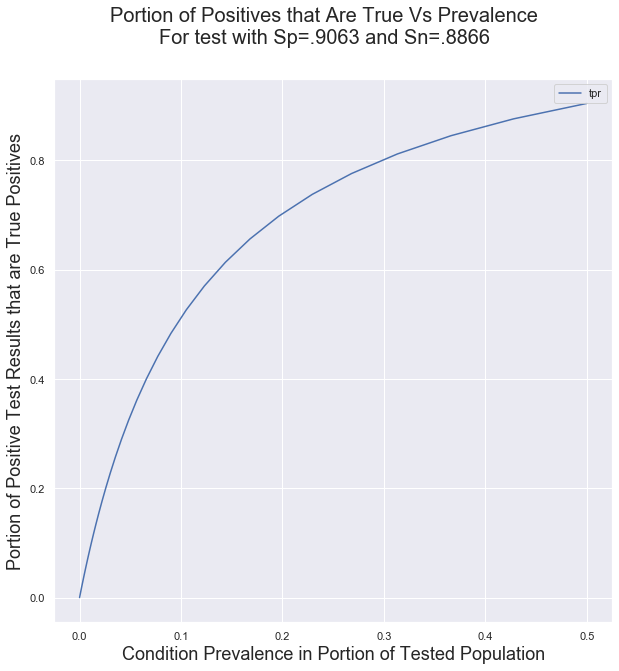

In [159]:

Sp = .9063
Sn = .8866

def p_vs_tpr(Sp, Sn):

    for p in np.power(10,np.linspace(-7,np.log10(.5), num=100)): # range from 1 per 10m to 50%
        tpr = (p*Sn) / ( (p*Sn)+(1-p)*(1-Sp))
        yield (p, tpr)
    
df = pd.DataFrame(list(p_vs_tpr(Sp, Sn)), columns='p tpr'.split())
df.head()

fig, ax = plt.subplots(figsize=(12,8))

df.plot(ax=ax, x='p',y='tpr', figsize=(10,10))

fig.suptitle('Portion of Positives that Are True Vs Prevalence\nFor test with Sp=.9063 and Sn=.8866', fontsize=20)

ax.set_xlabel('Condition Prevalence in Portion of Tested Population', fontsize=18)
ax.set_ylabel('Portion of Positive Test Results that are True Positives', fontsize=18)


#ax.set_xscale('log')
#ax.set_yscale('log')

In [120]:

# Find the row with a TPR closest to 50%
loss_min_idx = (df['tpr']-.5).abs().idxmin()
df.iloc[loss_min_idx]

p      0.090082
tpr    0.483672
Name: 88, dtype: float64

In [132]:


def gen_data():

    for Sp in np.linspace(.9,1,num=20,endpoint=False):
        for Sn in np.linspace(.88,1,num=20,endpoint=False):            
            df = pd.DataFrame(list(p_vs_tpr(Sp, Sn)), columns='p tpr'.split())
            # Find the row with a TPR closest to 50%
            loss_min_idx = (df['tpr']-.5).abs().idxmin()
            p = df.iloc[loss_min_idx].p
            yield (Sp, Sn, p)

df = pd.DataFrame(list(gen_data()), columns='Sp Sn p'.split())



In [152]:
flights = sns.load_dataset("flights")

flights = flights.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


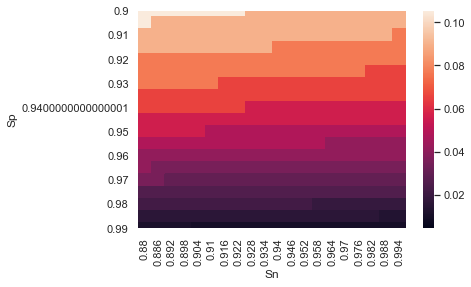

In [154]:
import seaborn as sns; sns.set()

t =df.pivot_table('p','Sp','Sn')

ax = sns.heatmap(t)


Now we can calculate these values for the situation in the US when it first hit 100 cases, on March 3. 

In [11]:
# What was the date that the US first hit 100 cases?
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/jhu.edu-covid19-1.zip')
df = pkg.resource('confirmed').dataframe()
df[df.location == 'US'].date_100.unique()

array(['2020-03-03T00:00:00.000000000'], dtype='datetime64[ns]')

Assume that on March 3, using the test described in the article linked above, that the US Government was able to test the whole US population, and that the actual number of cases was 10X of the reported number. So we have: 

* $\mathit{Sp} = .9063$
* $\mathit{Sn} = .8866$
* $P = 329e6$
* $p = 1000/P$


In [104]:
# In machine learning, the chart of the TP, FP, TN, FN values
# is called a confusion matrix. 

def calc_cm(p, P, Sp, Sn):
    
    TP = P * p * Sn
    FP = P * (1 - p) * ( 1 - Sp )
    TN = P * ( 1 - p ) * Sp
    FN = P * p * ( 1- Sn )
    
    return ( TP, FP, TN, FN)

recorded_cases = 100
actual_cases = recorded_cases * 10
P = 1e6 #329e6
p = actual_cases / P
    
"p={} TP={} FP={} TN={} FN={}".format(p, *calc_cm(p, P, Sp, Sn))
    

'p=0.001 TP=886.6 FP=93606.3 TN=905393.7 FN=113.39999999999995'

So, in this case, of 1,000 infections in the whole US, the testing would have caught 886 of them, while producing 31 million false positives. 

In [40]:
import pandas as pd
import numpy as np

def gen_data(p, Sp, Sn):
    tests = np.linspace(1e6,250e6, num=101)
    
    for tn  in tests:
        yield (tn,p)+tuple(int(e) for e in calc_cm(p, tn, Sp, Sn))
    
df = pd.DataFrame(list(gen_data(p,Sp, Sn)), columns='tests p TP FP TN FN'.split())
df['p_ratio'] = (df.p*df.tests) / df.TP
df

,tests,p,TP,FP,TN,FN,p_ratio
0,1000000.0,0.001,886,93606,905393,113,1.128668
1,3490000.0,0.001,3094,326685,3159824,395,1.127990
2,5980000.0,0.001,5301,559765,5414254,678,1.128089
3,8470000.0,0.001,7509,792845,7668684,960,1.127980
4,10960000.0,0.001,9717,1025925,9923114,1242,1.127920
5,13450000.0,0.001,11924,1259004,12177545,1525,1.127977
6,15940000.0,0.001,14132,1492084,14431975,1807,1.127937
7,18430000.0,0.001,16340,1725164,16686405,2089,1.127907
8,20920000.0,0.001,18547,1958243,18940836,2372,1.127945
9,23410000.0,0.001,20755,2191323,21195266,2654,1.127921
